In [56]:
# 交叉相关检验检验，


# 超参数
COLS_Y = 'encoded_305_price'
COLS_X = 'amount'
COLS_DATE ='date'
#COLS_ALL = ['date', 'amount', 'refuelLiters', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays', 'encoded_wc_night', 'code_week', 'encoded_holidays', '305_price','305_order_cnt','305_amount','313_price','313_order_cnt','313_amount' ]
COLS_ALL = ['date', 'amount','order_cnt', 'code_day' , 'code_night', 'high', 'low', 'encoded_wc_night', 'code_week', 'code_holidays','encoded_holidays', '305_price','encoded_305_price','313_price' ,'encoded_313_price']

import pandas as pd

# 读取excel文件并获取指定列
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
print(df.tail())


           date  order_cnt       amount  code_day  code_night  high  low  \
359  2023-12-26    1072045  335929197.6         2           1     9    0   
360  2023-12-27    1054896  332618128.4         1           0    12    0   
361  2023-12-28    1032115  323028612.7         0           1    12    3   
362  2023-12-29    1218840  372592734.2         1           7    12    5   
363  2023-12-30    1126207  341635923.3         2           0    14    1   

     encoded_wc_night  code_week  code_holidays  encoded_holidays  305_price  \
359                 1          2              1                 4        7.5   
360                 0          3              1                 4        7.5   
361                 0          4              1                 4        7.5   
362                 0          5              1                 4        7.5   
363                 2          6              1                 4        7.5   

     encoded_305_price  313_price  encoded_313_price  
359    

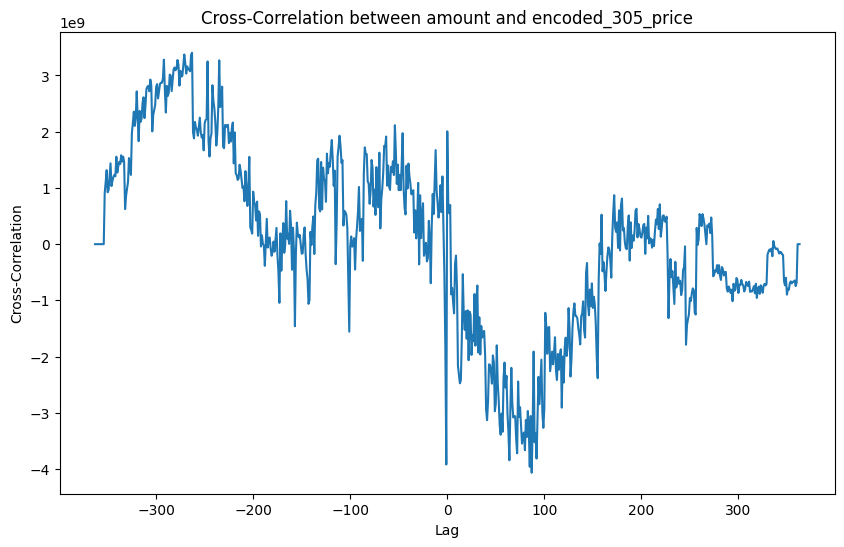

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 计算交叉相关
cross_corr = np.correlate(df[COLS_X], df[COLS_Y], mode='full')

# 设置滞后
lags = np.arange(-len(df[COLS_X]) + 1, len(df[COLS_Y]))


# 绘制交叉相关图
plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr)
plt.title("Cross-Correlation between "+COLS_X+" and "+COLS_Y)
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.show()

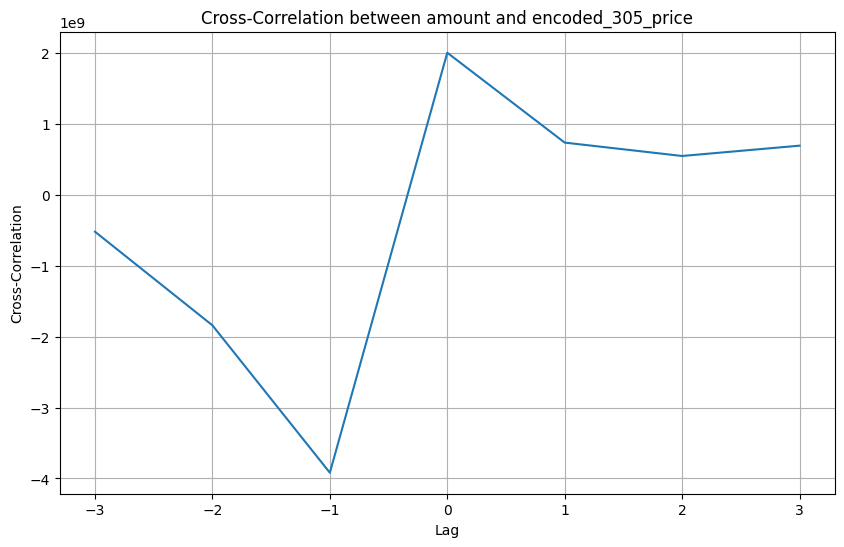

In [58]:
# 切片显示
# 只显示滞后范围 -10 到 10
lag_range = (-5, 5)
lag_indices = np.where((lags >= lag_range[0]) & (lags <= lag_range[1]))[0]
filtered_lags = lags[lag_indices]
filtered_cross_corr = cross_corr[lag_indices]

# 绘制交叉相关图
plt.figure(figsize=(10, 6))
plt.plot(filtered_lags, filtered_cross_corr)
plt.title("Cross-Correlation between " + COLS_X + " and " + COLS_Y)
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.grid(True)
plt.show()

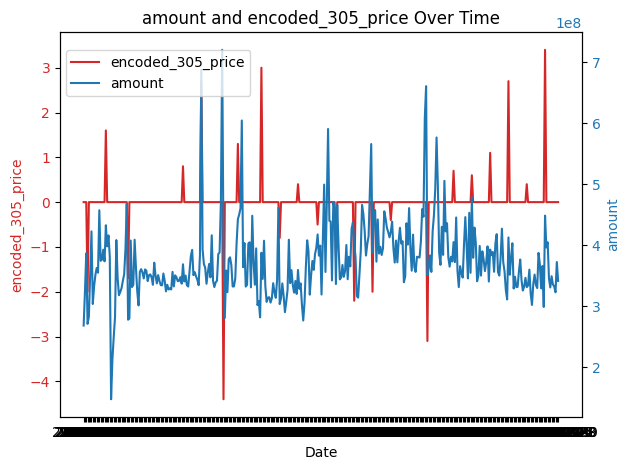

In [59]:
# 画出两者的曲线变化

# 创建一个新的图表，带有两个坐标轴
fig, ax1 = plt.subplots()

# 设置图表标题和X轴标签
ax1.set_title(COLS_X+' and '+COLS_Y+' Over Time')
ax1.set_xlabel('Date')

# 绘制销量的折线图，使用左侧Y轴
ax1.set_ylabel(COLS_Y, color='tab:red')
ax1.plot(df[COLS_DATE], df[COLS_Y], color='tab:red', label=COLS_Y)
ax1.tick_params(axis='y', labelcolor='tab:red')

# 创建第二个坐标轴，共享X轴
ax2 = ax1.twinx()
ax2.set_ylabel(COLS_X, color='tab:blue')
ax2.plot(df[COLS_DATE], df[COLS_X], color='tab:blue', label=COLS_X)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# 添加图例
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# 显示图表
plt.show()